#### Click on "run all" to run the tool.

## Jump to:
#### [Generation](#generation)
#### [Validation](#validation)
#### [Sorting](#sorting)
#### [Configuration Set Analysus](#configuration_set_analysis)
#### [Individual Configuration Analysus](#individual_configuration_analysis)

***

In [1]:
from handlers import configurations_handler
from handlers import validation_handler
from handlers import visualize_handler

from databases import loads
from databases import fos
from databases import materials
from databases import fluids

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import pickle as pkl


Authenticating Valispace...

You have been successfully connected to the https://projectstratos.valispace.com/rest/ API.


#### Select which config file to import (with "config" alias if necessary)

In [2]:
import config


Authenticating Valispace...

You have been successfully connected to the https://projectstratos.valispace.com/rest/ API.


***

<a id='generation'></a>
# Generation
#### Generate a list of configurations, or load from a save file.

In [3]:
# Run parameters

save_configurations = False # Saves configurations AFTER VALIDATION
load_from_file = False # Set to True to load from file. If set to True, validations will not run.
path_to_file = "saves/configurations_2023-02-15_15-27-33.pkl" # Adjust this accordingly

In [4]:
if load_from_file:
    with open(path_to_file, "rb") as f:
        passed_configurations, failed_configurations = pkl.load(f)
else:
    # Pass empty list to append to, and config object (config.py).
    configurations = configurations_handler.generate([], config)

Generating 4375000 configurations...


100%|██████████| 4375000/4375000 [01:20<00:00, 54647.89it/s] 

Generated 1179500 configurations out of 4375000.


***

<a id='validation'></a>
# Validation
#### Select loading case:

In [5]:
loading_case = loads.launch
print(*loading_case)

axial shear moment lateral a_axial a_lateral


#### Max. mass validation.

In [6]:
if not load_from_file:
    passed_configurations, failed_configurations = validation_handler.max_mass(configurations, 20)

Validating configurations


100%|██████████| 1179500/1179500 [00:48<00:00, 24405.37it/s]

Failed 0 configurations due to mass being greater than 20 kg. 1179500 configurations passed.


#### Configuration: Ullage validation (check if within range)

In [7]:
if not load_from_file:
    passed_configurations, _ = validation_handler.ullage_check(passed_configurations, config, config.ullage_range[0], config.ullage_range[1]) # Range of allowable ullage
    failed_configurations += _

Validating configurations


100%|██████████| 1179500/1179500 [00:06<00:00, 175162.73it/s]


Failed 1157225 configurations due to ullage. 22275 configurations passed.


#### Cylinder: hoop collapse validation (max. hoop stress).

In [8]:
if not load_from_file:
    passed_configurations, _ = validation_handler.cylinder_hoop_collapse(passed_configurations)
    failed_configurations += _

Validating configurations


100%|██████████| 22275/22275 [00:00<00:00, 445307.20it/s]

Failed 0 configurations due to hoop stress collapse. 22275 configurations passed.


#### Cylinder: axial buckling validation (max. axial load).

In [9]:
if not load_from_file:
    passed_configurations, _ = validation_handler.cylinder_axial_buckling(passed_configurations, loading_case)
    failed_configurations += _

Validating configurations


100%|██████████| 22275/22275 [00:01<00:00, 16140.25it/s]

Failed 0 configurations due to axial buckling. 22275 configurations passed.


#### Cylinder: bending buckling validation (max. moment).

In [10]:
if not load_from_file:
    passed_configurations, _ = validation_handler.cylinder_bending_buckling(passed_configurations, loading_case)
    failed_configurations += _

Validating configurations


100%|██████████| 22275/22275 [00:01<00:00, 16874.40it/s]

Failed 0 configurations due to bending buckling. 22275 configurations passed.


#### Cylinder: combined loading validation (load interaction equations).

In [11]:
if not load_from_file:
    passed_configurations, _ = validation_handler.cylinder_load_interaction(passed_configurations, loading_case)
    failed_configurations += _

Validating configurations


100%|██████████| 22275/22275 [00:03<00:00, 7242.84it/s]

Failed 0 configurations due to loads interaction. 22275 configurations passed.


#### Cylinder: Stiffness (1st bending frequency check)

In [12]:
# if not load_from_file:
#     passed_configurations, _ = validation_handler.cylinder_stiffness(passed_configurations)
#     failed_configurations += _

#### Skirts: axial buckling validation

In [13]:
if not load_from_file:
    passed_configurations, _ = validation_handler.skirt_axial_buckling(passed_configurations, loading_case)
    failed_configurations += _

Validating configurations


100%|██████████| 22275/22275 [01:40<00:00, 221.54it/s]

Failed 8075 configurations due to skirt axial buckling. 14200 configurations passed.


#### Skirts: bending validation

In [14]:
if not load_from_file:
    passed_configurations, _ = validation_handler.skirt_bending_buckling(passed_configurations, loading_case)
    failed_configurations += _

Validating configurations


100%|██████████| 14200/14200 [00:58<00:00, 242.13it/s]

Failed 8005 configurations due to skirt bending buckling. 6195 configurations passed.


#### Skirts: combined loading validation (load interaction equations).

In [15]:
if not load_from_file:
    passed_configurations, _ = validation_handler.skirt_load_interaction(passed_configurations, loading_case)
    failed_configurations += _

Validating configurations


100%|██████████| 6195/6195 [00:02<00:00, 2622.64it/s]

Failed 3955 configurations due to loads interaction. 2240 configurations passed.


#### Dome: yield check

In [16]:
if not load_from_file:
    passed_configurations, _ = validation_handler.dome_yielding(passed_configurations, loading_case)
    failed_configurations += _

Validating configurations


  0%|          | 0/2240 [00:00<?, ?it/s]c:\Users\marce\Documents\Documents\DARE\STRATOS\Code\tank-sizing\sections\dome.py:170: RuntimeWarning: divide by zero encountered in double_scalars
  phi = np.arctan(local_radius / z_d)
100%|██████████| 2240/2240 [00:03<00:00, 580.80it/s]

Failed 1120 configurations due to dome yielding. 1120 configurations passed.


***
# Save configurations

In [17]:
if save_configurations and not load_from_file:
    configurations_handler.save_to_file((passed_configurations, failed_configurations))

***

<a id='sorting'></a>
# Sorting
#### Sort configurations by mass.

In [18]:
sorted_passed_configurations_mass = configurations_handler.sort_by_mass(passed_configurations)
sorted_failed_configurations_mass = configurations_handler.sort_by_mass(failed_configurations)
sorted_passed_configurations_mass[0].mass, sorted_passed_configurations_mass[-1].mass

Sorting configurations by mass
Sorting configurations by mass


(10.841076524092706, 12.20631565361954)

#### Sort configurations by height.

In [19]:
sorted_configurations_height = configurations_handler.sort_by_height(passed_configurations)
sorted_configurations_height[0].height, sorted_configurations_height[-1].height

Sorting configurations by height


(0.7950000000000006, 0.8150000000000004)

***

<a id='configuration_set_analysis'></a>
# Configurations Set Analysis
#### Plot some relations with sorted_configurations. Seaborn takes pandas dataframes as input, so generate one with all the configuration and subsection attributes.

In [20]:
analyze_set = False # Set to True to analyze the set
every_n = 25 # Increase this if configurations set is very big

In [21]:
if analyze_set:
    # Add configuration attributes to dataframe
    passed_configurations_ = passed_configurations[::every_n]
    failed_configurations_ = failed_configurations[::every_n]
    print(f"Setting up {len(passed_configurations_) + len(failed_configurations_)} configurations")

    configurations_dataframe = pd.DataFrame(columns=[attr for attr in dir(passed_configurations_[0]) if not (attr.startswith("__") or attr.startswith("_"))])

    for configuration in passed_configurations_:
        configurations_dataframe = configurations_dataframe.append({attr: getattr(configuration, attr) for attr in configurations_dataframe.columns}, ignore_index=True)
    for configuration in failed_configurations_:
        configurations_dataframe = configurations_dataframe.append({attr: getattr(configuration, attr) for attr in configurations_dataframe.columns}, ignore_index=True)

    configurations_dataframe["passed"] = [True] * len(passed_configurations_) + [False] * len(failed_configurations_)

    configurations_dataframe.columns = ["configuration." + column for column in configurations_dataframe.columns]

    print("Done configurations")

    # Add forward dome attributes to dataframe

    forward_domes_dataframe = pd.DataFrame(columns=[attr for attr in dir(passed_configurations_[0].forward_dome) if not (attr.startswith("__") or attr.startswith("_"))])

    forward_domes = [configuration.forward_dome for configuration in passed_configurations_] + [configuration.forward_dome for configuration in failed_configurations_]
    for forward_dome in forward_domes:
        forward_domes_dataframe = forward_domes_dataframe.append({attr: getattr(forward_dome, attr) for attr in forward_domes_dataframe.columns}, ignore_index=True)

    forward_domes_dataframe.columns = ["forward_dome." + column for column in forward_domes_dataframe.columns]

    print("Done forward domes")

    # Add aft dome attributes to dataframe

    aft_domes_dataframe = pd.DataFrame(columns=[attr for attr in dir(passed_configurations_[0].aft_dome) if not (attr.startswith("__") or attr.startswith("_"))])

    aft_domes = [configuration.aft_dome for configuration in passed_configurations_] + [configuration.aft_dome for configuration in failed_configurations_]
    for aft_dome in aft_domes:
        aft_domes_dataframe = aft_domes_dataframe.append({attr: getattr(aft_dome, attr) for attr in aft_domes_dataframe.columns}, ignore_index=True)

    aft_domes_dataframe.columns = ["aft_dome." + column for column in aft_domes_dataframe.columns]

    print("Done aft domes")

    # Add cylinder attributes to dataframe

    cylinders_dataframe = pd.DataFrame(columns=[attr for attr in dir(passed_configurations_[0].cylinder) if not (attr.startswith("__") or attr.startswith("_"))])

    cylinders = [configuration.cylinder for configuration in passed_configurations_] + [configuration.cylinder for configuration in failed_configurations_]
    for cylinder in cylinders:
         cylinders_dataframe = cylinders_dataframe.append({attr: getattr(cylinder, attr) for attr in cylinders_dataframe.columns}, ignore_index=True)

    cylinders_dataframe.columns = ["cylinder." + column for column in cylinders_dataframe.columns]

    print("Done cylinders")

    # Concatenate dataframes

    configurations_dataframe = pd.concat([configurations_dataframe, forward_domes_dataframe, aft_domes_dataframe, cylinders_dataframe], axis=1)

#### The following are the parameters available to plot. Note that some columns contain pointers to functions, and so cannot be plotted easily.

In [22]:
if analyze_set:
    configurations_dataframe.columns.tolist()

#### Plot a set of parameters. Modify this to get different relations.

In [23]:
if analyze_set:
    sns.set_theme(style="ticks")
    sns.relplot(data=configurations_dataframe,
                x="forward_dome.thickness",
                y="configuration.mass",
                hue="configuration.passed",
                size=None,
                col="configuration.passed",
                markers=None,
                kind="scatter")
    plt.gcf().set_size_inches(12, 8)

    plt.show()

In [24]:
if analyze_set:
    sns.set_theme(style="ticks")
    sns.boxplot(data=configurations_dataframe,
                x="forward_dome.type_",
                y="configuration.mass",
                hue="configuration.passed")
    plt.gcf().set_size_inches(12, 8)


***

<a id='individual_configuration_analysis'></a>
# Individual Configuration Analysis
#### Analyze a specific configuration.

In [25]:
#tank = sorted_passed_configurations_mass[0] # Select which configuration to analyze

for configuration in sorted_passed_configurations_mass:
    if configuration.forward_dome.type_ == "semi-ellipsoidal":
        tank = configuration
        break

#### Get the configuration's attributes

In [26]:
# Arrange attributes into a dataframe for nice displaying

df = pd.DataFrame(columns=["Section", "Attribute", "Value"])

for attr in dir(tank):
    # Check if attribute is a subsection
    if attr in ["cylinder", "forward_dome", "aft_dome", "forward_skirt", "aft_skirt"]:
        for sub_attr in dir(getattr(tank, attr)):
            # Don't store methods or private attributes
            if not callable(getattr(getattr(tank, attr), sub_attr)) and not sub_attr.startswith("__") and not sub_attr.startswith("_"):
                df = df.append({"Section": attr, "Attribute": sub_attr, "Value": getattr(getattr(tank, attr), sub_attr)}, ignore_index=True)
    # Don't store methods or private attributes
    elif not callable(getattr(tank, attr)) and not attr.startswith("__") and not attr.startswith("_"):
        df = df.append({"Section": "configuration", "Attribute": attr, "Value": getattr(tank, attr)}, ignore_index=True)

# Soft df by section
df = df.sort_values(by=["Section", "Attribute"])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df

,Section,Attribute,Value
0,aft_dome,height,0.08
1,aft_dome,inner_diameter,0.28
2,aft_dome,inner_radius,0.14
3,aft_dome,inner_volume,0.003284
4,aft_dome,is_thin_walled,1.0
5,aft_dome,mass,0.514105
6,aft_dome,material,"{'name': '6082-T6 aluminium', 'type': 'metal',..."
7,aft_dome,n,None
8,aft_dome,outer_diameter,0.288
9,aft_dome,outer_radius,0.144


#### Get validation results

In [27]:
# Put nested dict into df
validation_parameters = tank.validator_parameters
validation_parameters_df = pd.DataFrame(columns=["Validator", "Parameter", "Value", "Status"])


# Iterate over key:value pairs
for validator in validation_parameters:
    validation_parameters_df = validation_parameters_df.append({"Validator": validator,
                                                                "Parameter": validation_parameters[validator]["parameter"],
                                                                "Value": validation_parameters[validator]["value"],
                                                                "Status": validation_parameters[validator]["status"]},ignore_index=True)

validation_parameters_df

,Validator,Parameter,Value,Status
0,max_mass,configuration mass,10.841077,passed
1,ullage,inner volume,0.045668,passed
2,cylinder_hoop_collapse,hoop stress,177571202.586207,passed
3,cylinder_axial_buckling,critical axial buckling load,3009669.55117,passed
4,cylinder_bending_buckling,critical bending buckling load,216216.018871,passed
5,cylinder_load_interaction,axial compression and bending moment interaction,passed,passed
6,forward_skirt_axial_buckling,critical axial buckling load,239186.115913,passed
7,aft_skirt_axial_buckling,critical axial buckling load,239186.115913,passed
8,forward_skirt_bending_buckling,critical bending buckling load,61901.168715,passed
9,aft_skirt_bending_buckling,critical bending buckling load,61901.168715,passed


#### Visualize the configuration

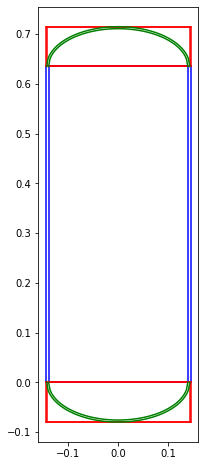

In [28]:
fix, ax = visualize_handler.plot_tank(tank)
plt.gcf().set_size_inches(12, 8)

In [29]:
tank.inner_volume/config.fluid_volume - 1 # Ullage

0.02400251910234541

In [30]:
tank.inner_volume

0.04566828520768365

In [31]:
df = pd.DataFrame(columns=["s", "s_type", "z_d"])

for z_d in np.linspace(0, tank.aft_dome.height, 200):
    s_mer, s_circ = tank.aft_dome.stress_state(z_d, loading_case)
    df = df.append({"s": s_mer, "s_type": "s_mer", "z_d": z_d}, ignore_index=True)
    df = df.append({"s": s_circ, "s_type": "s_circ", "z_d": z_d}, ignore_index=True)

c:\Users\marce\Documents\Documents\DARE\STRATOS\Code\tank-sizing\sections\dome.py:170: RuntimeWarning: divide by zero encountered in double_scalars
  phi = np.arctan(local_radius / z_d)


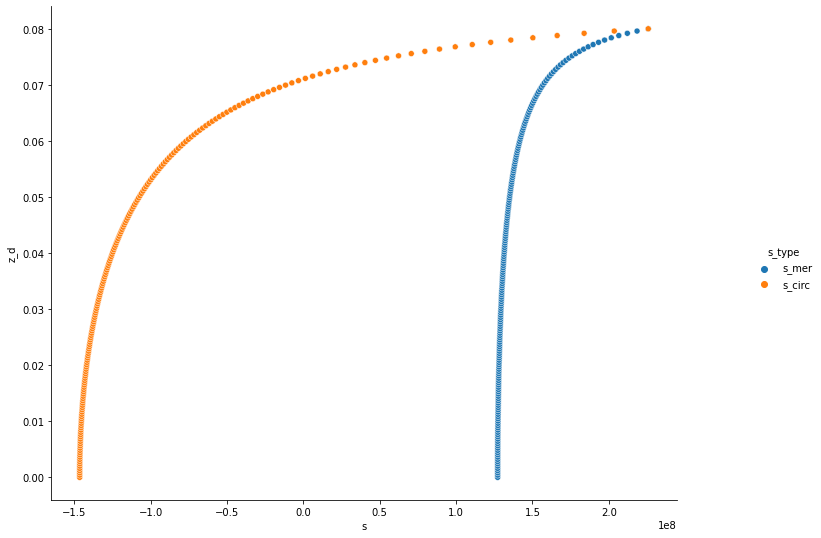

In [32]:
sns.relplot(data=df, x="s", y="z_d", hue="s_type", kind="scatter")

# Make plot bigger
plt.gcf().set_size_inches(12, 8)

In [33]:
tank.forward_dome.height / tank.forward_dome.outer_radius

0.5555555555555556